In [1]:
import numpy as np
import os
from PIL import Image
import torch
import cv2
from torch.autograd import Variable
from SSD.data import BaseTransform,VOC_CLASSES as mapping
from SSD.ssd import build_ssd
import matplotlib.pyplot as plt

C:\Users\naman grover\Desktop\ML-python\gthub\Illegal_Parking\


In [2]:
model=build_ssd('test')
model.load_state_dict(torch.load("SSD/ssd300_mAP_77.43_v2.pth",map_location=lambda storage,loc:storage))
transform=BaseTransform(model.size,(104/256.0,117/256.0,123/256.0))

C:\Users\naman grover\Desktop\ML-python\gthub\Illegal_Parking\SSD\ssd.py:33: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.priors = Variable(self.priorbox.forward(), volatile=True)
C:\Users\naman grover\Desktop\ML-python\gthub\Illegal_Parking\SSD\layers\modules\l2norm.py:17: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.weight,self.gamma)


In [13]:
# def detect(frame , net , trans):
#     height,width=frame.shape[:2]
#     frame_t=trans(frame)[0]
#     x=torch.from_numpy(frame_t).permute(2,0,1)      #rbg to grb
#     x=Variable(x.unsqueeze(0))
#     y=net(x)
#     detectioins=y.data    #[batch,class,num_class,(score,x0,y0,x1,y1)]
#     scale=torch.Tensor([width,height,width,height])
#     i=7  #for cars
#     num=0
#     coor=[]
#     while detectioins[0,i,num,0]>=0.6 and mapping[i-1]=="car":
#         points=detectioins[0,i,num,1:]
#         points=points*scale
#         points=points.numpy()
#         cv2.rectangle(frame,(int(points[0]),int(points[1])),(int(points[2]),int(points[3])),(0,255,0),2)
# #             cv2.putText(frame,mapping[i-1],(int(points[0]),int(points[1])),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),2,cv2.LINE_AA)
#         num+=1
#         coor.append(points)
#     return frame,num,sorted(coor,key=lambda x : x[0])

(<matplotlib.image.AxesImage at 0x18fa5fbea90>,
 5,
 [array([  6.6917987, 105.89972  ,  72.499725 , 150.6575   ], dtype=float32),
  array([ 94.73606, 106.46667, 303.44452, 282.21637], dtype=float32),
  array([245.27838, 164.60269, 651.65265, 409.37045], dtype=float32),
  array([261.04266, 101.85026, 360.57718, 164.27174], dtype=float32),
  array([293.45724, 153.41165, 636.7359 , 281.71136], dtype=float32)])

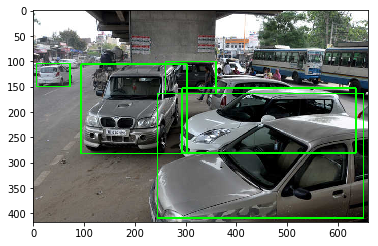

In [14]:
# img=Image.open("./SSD/test.jpg")
# frame,num,coor=detect(np.array(img),model,transform)
# plt.imshow(frame),num , coor

In [11]:
# labels=[]
# count=0
# for i in os.listdir("../illegal parking/Test_im_2"):
#     count+=1
#     print(count,end=" ")
#     img=Image.open("../../illegal parking/Test_im_2"+i)
#     img=img.resize((224,224))
#     img=np.array(img)
#     frame,num,coor=detect(img,model,transform)
#     labels.append([i,num,coor,[0]*num])

In [10]:
# import pickle as pkl
# with open("labels_135.pickle","wb") as file:
#     pkl.dump(labels,file)b

## LABELLING 

In [3]:
def detectandlabel(frame , net , trans):
    height,width=frame.shape[:2]
    frame_t=trans(frame)[0]
    x=torch.from_numpy(frame_t).permute(2,0,1)      #rbg to grb
    x=Variable(x.unsqueeze(0))
    y=net(x)
    detectioins=y.data    #[batch,class,num_class,(score,x0,y0,x1,y1)]
    scale=torch.Tensor([width,height,width,height])
    i=7  #for cars
    num=0
    coor=[]
    labels=[]
    plt.ion()
    plt.figure()
    while detectioins[0,i,num,0]>=0.6 and mapping[i-1]=="car":
        points=detectioins[0,i,num,1:]
        points=points*scale
        points=points.numpy()
        cv2.rectangle(frame,(int(points[0]),int(points[1])),(int(points[2]),int(points[3])),(0,255,0),2)
#             cv2.putText(frame,mapping[i-1],(int(points[0]),int(points[1])),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),2,cv2.LINE_AA)
        plt.imshow(frame)
        plt.show()
        label = input("enter the label")
        if label == -1:
            return (num,sorted(coor,key=lambda x : x[0]),labels),1
        plt.close()
        labels.append(label)
        num+=1
        coor.append(points)
    return (num,sorted(coor,key=lambda x : x[0]),labels),0

In [4]:
# new_labels=[]
# break_point=0
# for i in range(len(labels)):
#     img=Image.open("./Data/images/"+labels[i][0])
#     img=img.resize((224,224))
#     img=np.array(img)
#     print(i)
#     data,err=detectandlabel(img,model,transform)
#     if err == 1:
#         break_point=i
#         break
#     new_labels.append((labels[i][0],data))

In [5]:
# new_labels

In [6]:
# import pickle as pkl
# with open("labels_135.pickle","wb") as file:
#     pkl.dump(new_labels,file)

In [7]:
# import pickle as pkl

# labels=[]
# with open("labels_135.pickle","rb") as file:
#     labels=pkl.load(file)

# with open("./labels_nxt45.pickle","rb") as file:
#     labels=labels+pkl.load(file)

# with open("labels.pickle","wb") as file:
#     pkl.dump(labels,file)